# Bug in impute + Comparison of Autocorr, ACF and PACF With The Robot Failure Example

This notebook has 2 goals:

 1. Document a bug in tsfresh with the use of the robot failure dataset
 2. Compare the pandas integrated autocorrelation function with the statsmodels acf and pacf function

In [1]:
%matplotlib inline
import matplotlib.pylab as plt
import seaborn as sns
from tsfresh.examples.robot_execution_failures import download_robot_execution_failures, load_robot_execution_failures
from tsfresh import extract_features, extract_relevant_features, select_features
from tsfresh.utilities.dataframe_functions import impute, impute_dataframe_zero
from tsfresh.feature_extraction import ComprehensiveFCParameters
from sklearn.tree import DecisionTreeClassifier
from sklearn.cross_validation import train_test_split
from sklearn.metrics import classification_report

import numpy as np
import pandas as pd
from statsmodels.tsa.stattools import acf, pacf

sns.set(font_scale=1.75)
sns.set_style('whitegrid')
sns.set_palette('colorblind')

/home/niklas/anaconda3/envs/py27tsfresh/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)
/home/niklas/anaconda3/envs/py27tsfresh/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
download_robot_execution_failures()
df, y = load_robot_execution_failures()
df.head()

id  time  F_x  F_y  F_z  T_x  T_y  T_z
0   1     0   -1   -1   63   -3   -1    0
1   1     1    0    0   62   -3   -1    0
2   1     2   -1   -1   61   -3    0    0
3   1     3   -1   -1   63   -2   -1    0
4   1     4   -1   -1   63   -3   -1    0

In [3]:
df.head(20)

id  time  F_x  F_y  F_z  T_x  T_y  T_z
0    1     0   -1   -1   63   -3   -1    0
1    1     1    0    0   62   -3   -1    0
2    1     2   -1   -1   61   -3    0    0
3    1     3   -1   -1   63   -2   -1    0
4    1     4   -1   -1   63   -3   -1    0
5    1     5   -1   -1   63   -3   -1    0
6    1     6   -1   -1   63   -3    0    0
7    1     7   -1   -1   63   -3   -1    0
8    1     8   -1   -1   63   -3   -1    0
9    1     9   -1   -1   61   -3    0    0
10   1    10   -1   -1   61   -3    0    0
11   1    11   -1   -1   64   -3   -1    0
12   1    12   -1   -1   64   -3   -1    0
13   1    13   -1   -1   60   -3    0    0
14   1    14   -1    0   64   -2   -1    0
15   2     0   -1   -1   63   -2   -1    0
16   2     1   -1   -1   63   -3   -1    0
17   2     2   -1   -1   61   -3    0    0
18   2     3    0   -4   63    1    0    0
19   2     4    0   -1   59   -2    0   -1

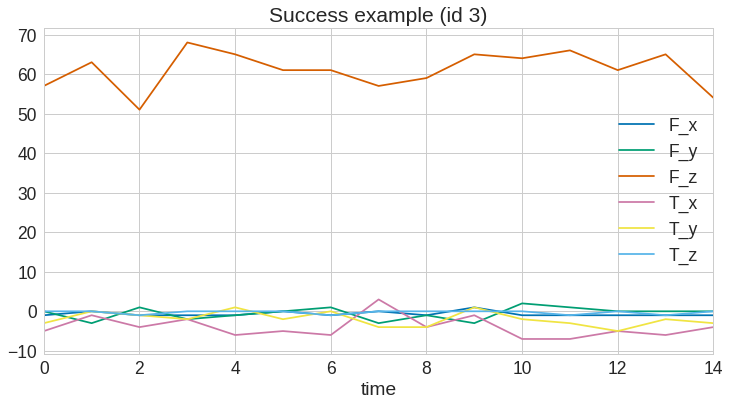

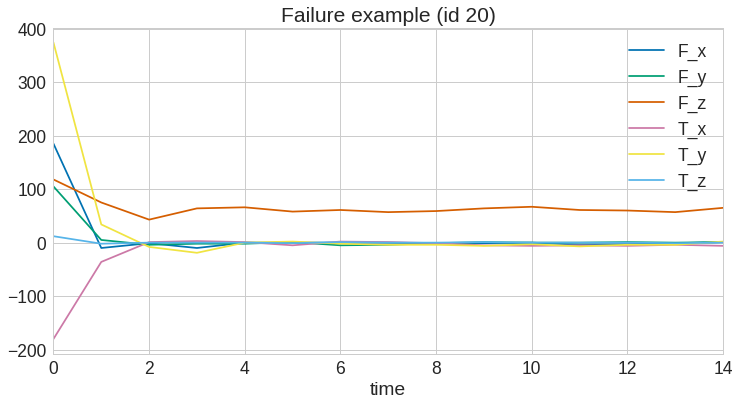

In [4]:
df[df.id == 3][['time', 'F_x', 'F_y', 'F_z', 'T_x', 'T_y', 'T_z']].plot(x='time', title='Success example (id 3)', figsize=(12, 6));
df[df.id == 20][['time', 'F_x', 'F_y', 'F_z', 'T_x', 'T_y', 'T_z']].plot(x='time', title='Failure example (id 20)', figsize=(12, 6));

## Extract Features

In [5]:
extraction_settings = ComprehensiveFCParameters()

In [6]:
X_impute = extract_features(df, 
                            column_id='id', column_sort='time',
                            default_fc_parameters=extraction_settings,
                            impute_function=impute)

Feature Extraction: 100%|██████████| 528/528 [00:10<00:00, 52.57it/s]
 'F_x__agg_linear_trend__f_agg_"max"__chunk_len_50__attr_"intercept"'
 'F_x__agg_linear_trend__f_agg_"max"__chunk_len_50__attr_"rvalue"' ...,
 'T_z__fft_coefficient__coeff_9__attr_"imag"'
 'T_z__fft_coefficient__coeff_9__attr_"real"'
 'T_z__spkt_welch_density__coeff_8'] did not have any finite values. Filling with zeros.


In [7]:
X_impute_dataframe_zero = extract_features(df,
                                           column_id='id', column_sort='time',
                                           default_fc_parameters=extraction_settings,
                                           impute_function=impute_dataframe_zero)

Feature Extraction: 100%|██████████| 528/528 [00:10<00:00, 49.95it/s]


List all columns that were generated by the `autocorrelation` function in tsfresh.

In [8]:
autocorrelation_cols = [col for col in X_impute.columns if 'autocorrelation__lag' in col]
autocorrelation_cols

['F_x__autocorrelation__lag_0',
 'F_x__autocorrelation__lag_1',
 'F_x__autocorrelation__lag_2',
 'F_x__autocorrelation__lag_3',
 'F_x__autocorrelation__lag_4',
 'F_x__autocorrelation__lag_5',
 'F_x__autocorrelation__lag_6',
 'F_x__autocorrelation__lag_7',
 'F_x__autocorrelation__lag_8',
 'F_x__autocorrelation__lag_9',
 'F_y__autocorrelation__lag_0',
 'F_y__autocorrelation__lag_1',
 'F_y__autocorrelation__lag_2',
 'F_y__autocorrelation__lag_3',
 'F_y__autocorrelation__lag_4',
 'F_y__autocorrelation__lag_5',
 'F_y__autocorrelation__lag_6',
 'F_y__autocorrelation__lag_7',
 'F_y__autocorrelation__lag_8',
 'F_y__autocorrelation__lag_9',
 'F_z__autocorrelation__lag_0',
 'F_z__autocorrelation__lag_1',
 'F_z__autocorrelation__lag_2',
 'F_z__autocorrelation__lag_3',
 'F_z__autocorrelation__lag_4',
 'F_z__autocorrelation__lag_5',
 'F_z__autocorrelation__lag_6',
 'F_z__autocorrelation__lag_7',
 'F_z__autocorrelation__lag_8',
 'F_z__autocorrelation__lag_9',
 'T_x__autocorrelation__lag_0',
 'T_x__a

In [9]:
X_impute[autocorrelation_cols].head()

variable  F_x__autocorrelation__lag_0  F_x__autocorrelation__lag_1  \
id                                                                   
1                                 1.0                    -0.076923   
2                                 1.0                    -0.093750   
3                                 1.0                    -0.342466   
4                                 1.0                    -0.311002   
5                                 1.0                     0.075713   

variable  F_x__autocorrelation__lag_2  F_x__autocorrelation__lag_3  \
id                                                                   
1                            0.180843                     0.204837   
2                            0.180843                     0.204837   
3                            0.180843                     0.204837   
4                            0.180843                     0.204837   
5                            0.180843                     0.204837   

variable  F_x__autocorrelation__lag_4  F_x__autocorrelation__lag_5  \
id                                                                   
1                             0.17553                     0.063926   
2                             0.17553                     0.063926   
3                             0.17553                     0.063926   
4                             0.17553                     0.063926   
5                             0.17553                     0.063926   

variable  F_x__autocorrelation__lag_6  F_x__autocorrelation__lag_7  \
id                                                                   
1                            0.022942                     0.080526   
2                            0.022942                     0.080526   
3                            0.022942                     0.080526   
4                            0.022942                     0.080526   
5                            0.022942                     0.080526   

variable  F_x__autocorrelation__lag_8  F_x__autocorrelation__lag_9  \
id                                                                   
1                             0.20315                     0.258199   
2                             0.20315                     0.258199   
3                             0.20315                     0.258199   
4                             0.20315                     0.258199   
5                             0.20315                     0.258199   

variable             ...               T_z__autocorrelation__lag_0  \
id                   ...                                             
1                    ...                                       1.0   
2                    ...                                       1.0   
3                    ...                                       1.0   
4                    ...                                       1.0   
5                    ...                                       1.0   

variable  T_z__autocorrelation__lag_1  T_z__autocorrelation__lag_2  \
id                                                                   
1                            0.392026                     0.206194   
2                            0.392026                     0.206194   
3                            0.392026                     0.206194   
4                            0.392026                     0.206194   
5                            0.392026                     0.206194   

variable  T_z__autocorrelation__lag_3  T_z__autocorrelation__lag_4  \
id                                                                   
1                            0.080582                     0.177171   
2                            0.080582                     0.177171   
3                            0.080582                     0.177171   
4                            0.080582                     0.177171   
5                            0.080582                     0.177171   

variable  T_z__autocorrelation__lag_5  T_z__autocorrelation__lag_6  \
id

I do not think that this is correct...

In [10]:
X_impute_dataframe_zero[autocorrelation_cols].head()

variable  F_x__autocorrelation__lag_0  F_x__autocorrelation__lag_1  \
id                                                                   
1                                 1.0                    -0.076923   
2                                 1.0                    -0.093750   
3                                 1.0                    -0.342466   
4                                 1.0                    -0.311002   
5                                 1.0                     0.075713   

variable  F_x__autocorrelation__lag_2  F_x__autocorrelation__lag_3  \
id                                                                   
1                            0.000000                     0.000000   
2                           -0.387445                    -0.388870   
3                            0.297020                    -0.347945   
4                           -0.403516                     0.369175   
5                           -0.117244                    -0.184637   

variable  F_x__autocorrelation__lag_4  F_x__autocorrelation__lag_5  \
id                                                                   
1                            0.000000                     0.000000   
2                            0.070423                     0.710011   
3                            0.254951                    -0.449467   
4                           -0.078193                    -0.450721   
5                           -0.393177                     0.052926   

variable  F_x__autocorrelation__lag_6  F_x__autocorrelation__lag_7  \
id                                                                   
1                        0.000000e+00                     0.000000   
2                       -5.882353e-02                    -0.313340   
3                        4.034265e-17                    -0.417365   
4                        5.103104e-01                     0.205557   
5                       -3.029914e-01                     0.056344   

variable  F_x__autocorrelation__lag_8  F_x__autocorrelation__lag_9  \
id                                                                   
1                            0.000000                     0.000000   
2                           -0.311805                     0.166667   
3                            0.645497                    -0.316228   
4                           -0.679366                     0.522233   
5                            0.848528                    -0.108465   

variable             ...               T_z__autocorrelation__lag_0  \
id                   ...                                             
1                    ...                                       0.0   
2                    ...                                       1.0   
3                    ...                                       1.0   
4                    ...                                       1.0   
5                    ...                                       1.0   

variable  T_z__autocorrelation__lag_1  T_z__autocorrelation__lag_2  \
id                                                                   
1                            0.000000                     0.000000   
2                            0.300000                     0.030429   
3                           -0.400000                     0.030429   
4                            0.312253                    -0.312653   
5                            0.538382                     0.209568   

variable  T_z__autocorrelation__lag_3  T_z__autocorrelation__lag_4  \
id                                                                   
1                            0.000000                     0.000000   
2                           -0.408248                    -0.462910   
3                           -0.333333                     0.240563   
4                           -0.714286                    -0.250217   
5                           -0.204980                    -0.449013   

variable  T_z__autocorrelation__lag_5  T_z__autocorrelation__lag_6  \
id

### This seems to be an issue with the tsfresh impute function. `Impute` seems erroneous, `impute_dataframe_zero` seems ok.

In [11]:
# Define number of lags and column of interest
nlags = 10
colname = 'F_y'

In [12]:
autocorr_results = pd.DataFrame(columns = range(nlags))
for lag in range(nlags):
    # Group by id and apply autocorr to every time series.
    # Save the autocorr values for different lags in a DataFrame
    autocorr_series = df[['time', 'id', colname]].groupby('id').apply(lambda x: pd.Series(x[colname]).autocorr(lag))
    autocorr_results[lag] = autocorr_series

## Compare groupby and autocorr to tsfresh results

By using the plotting style `o-`, one can identify missing values.

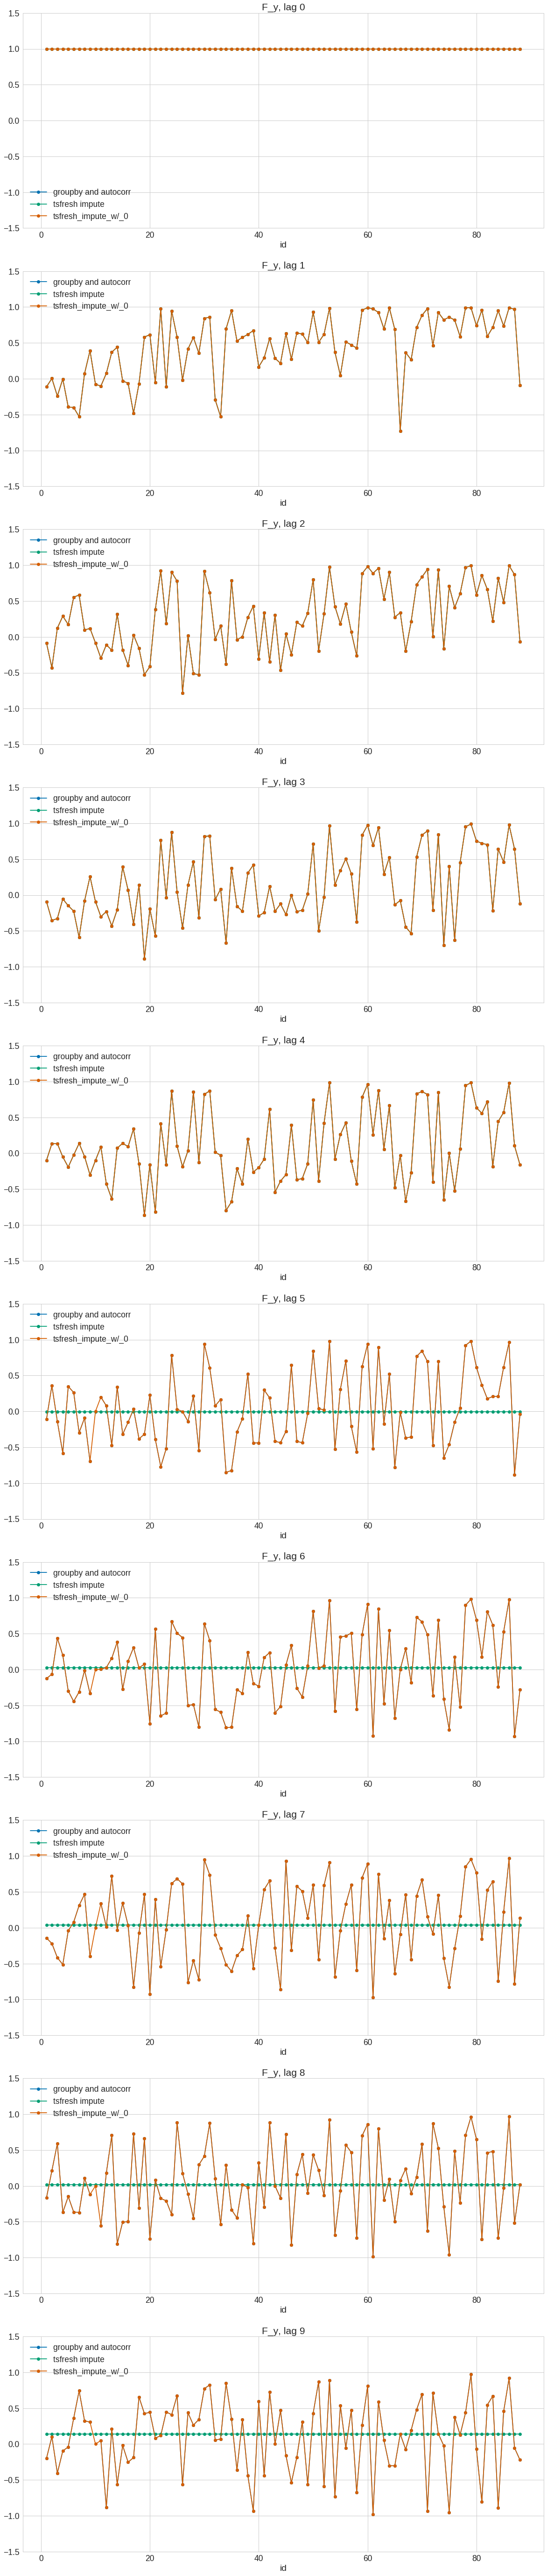

In [13]:
plt.figure(figsize=(20, nlags*10))
for lag in range(nlags):
    #autocorr_results = df[['time', 'id', colname]].groupby('id').apply(lambda x: pd.Series(x[colname]).autocorr(lag))
    plt.subplot(nlags,1,lag+1)
    plt.plot(autocorr_results[lag], 'o-')  # plot the groupby and autocorr result
    plt.plot(X_impute['{}__autocorrelation__lag_{}'.format(colname, lag)], 'o-')  # plot the tsfresh result
    plt.plot(X_impute_dataframe_zero['{}__autocorrelation__lag_{}'.format(colname, lag)], 'o-')  # plot the tsfresh result
    plt.legend(['groupby and autocorr', 'tsfresh impute', 'tsfresh_impute_w/_0'])
    plt.title('{}, lag {}'.format(colname, lag))
    plt.ylim([-1.5, 1.5])
    plt.xlabel('id')
plt.show()

**It seems that tsfresh fails to calculate the values for lags >= 5 fur `impute=impute`. The values for the lags 0-4 coincide.**

# Compare autocorr, acf and pacf

## Compare pd.Series.autocorr() with np.corrcoef

In [14]:
corrcoef_results = pd.DataFrame(columns=range(nlags))
for lag in range(nlags):
    ts_grouped_by_id = df[['time', 'id', colname]].groupby('id')
    corrcoef_series = ts_grouped_by_id.apply(lambda x: np.corrcoef(x[colname][:len(x)-lag], x[colname][lag:])[0,1])
    corrcoef_results[lag] = corrcoef_series

/home/niklas/anaconda3/envs/py27tsfresh/lib/python2.7/site-packages/numpy/lib/function_base.py:3162: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/niklas/anaconda3/envs/py27tsfresh/lib/python2.7/site-packages/numpy/lib/function_base.py:3163: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


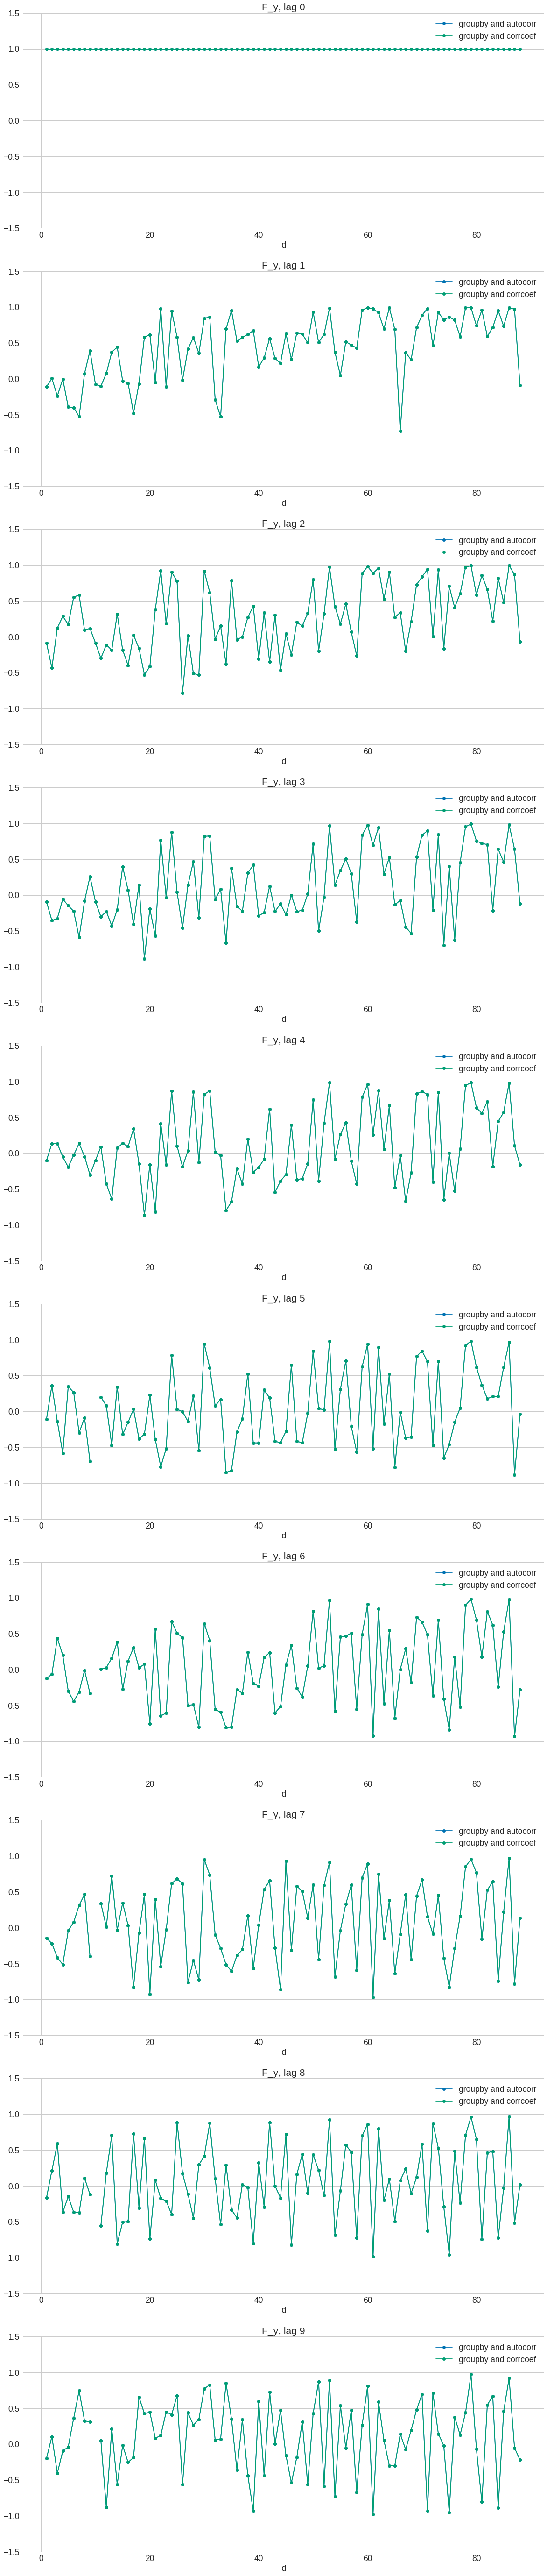

In [15]:
plt.figure(figsize=(20, nlags*10))
for lag in range(nlags):
    plt.subplot(nlags,1,lag+1)
    plt.plot(autocorr_results[lag], 'o-')  # plot the groupby and autocorr result
    plt.plot(corrcoef_results[lag], 'o-')  # plot the groupby and corrcoef result
    plt.legend(['groupby and autocorr', 'groupby and corrcoef'])
    plt.title('{}, lag {}'.format(colname, lag))
    plt.ylim([-1.5, 1.5])
    plt.xlabel('id')
plt.show()

This is how the the Pandas `autocorr` function works internally: By invoking `np.corrrcoef`.

## Compare acf to autocorr

I tried to convert the autocorr results to the acf results, but I failed.

In [16]:
# Save the acf values in a DataFrame
acf_results = pd.DataFrame(columns=range(nlags))
acf_series = df[['time', 'id', colname]].groupby('id').apply(lambda x: acf(pd.Series(x[colname]),
                                                                           nlags=nlags,
                                                                           unbiased=True))
for ts_id in acf_series.index:
    # print(pd.DataFrame(acf_series[ts_id]))
    acf_results = acf_results.append(pd.DataFrame(acf_series[ts_id], columns = [ts_id]).T)

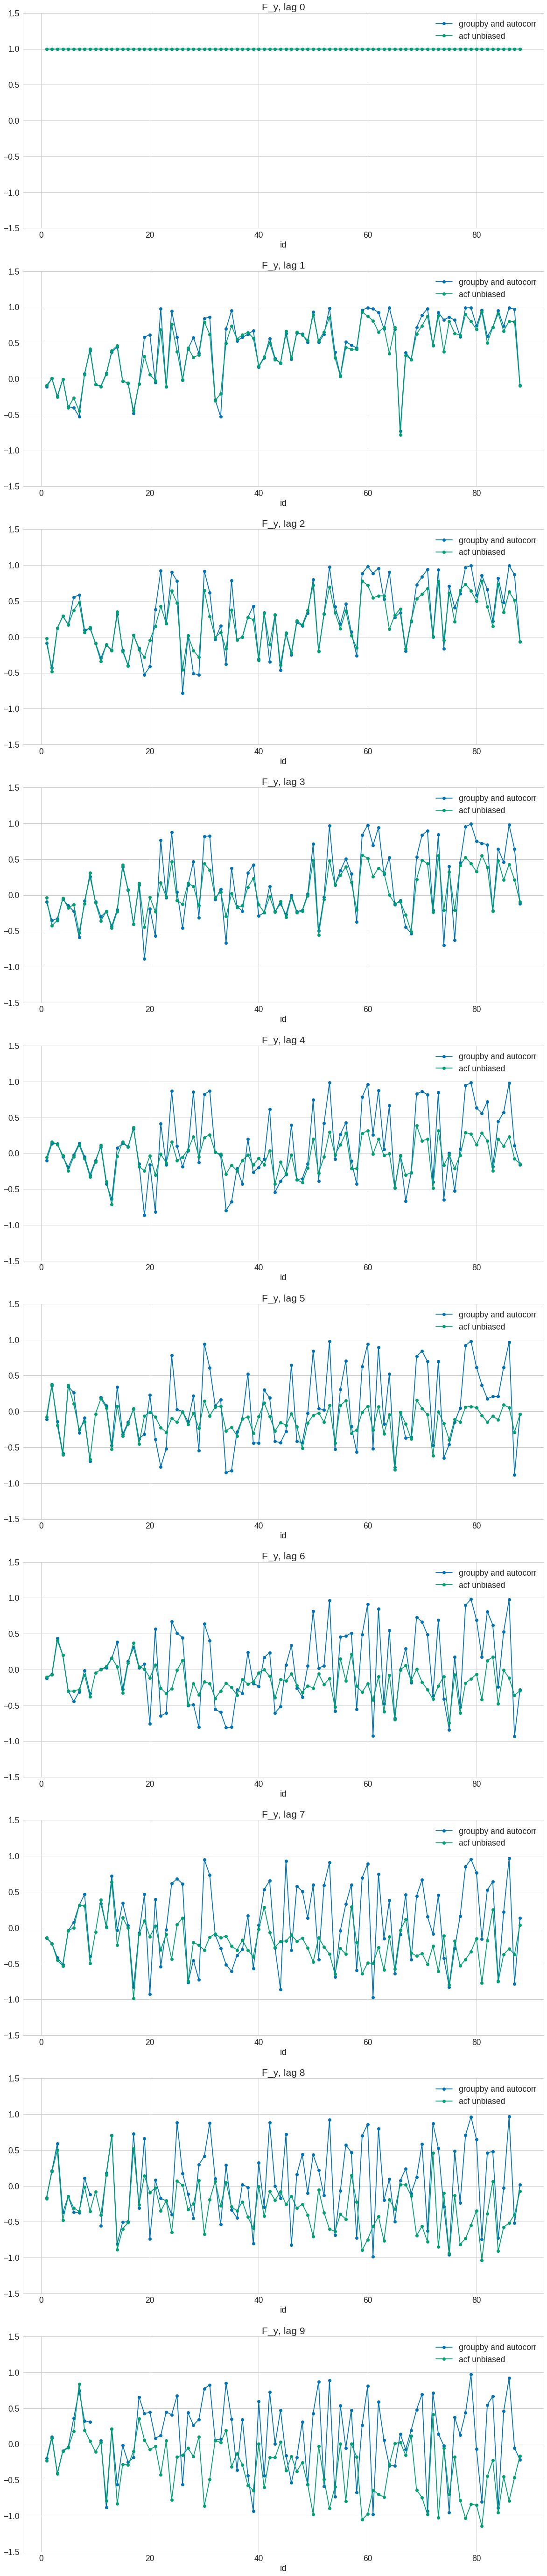

In [17]:
plt.figure(figsize=(20, nlags*10))
for lag in range(nlags):
    plt.subplot(nlags,1,lag+1)
    plt.plot(autocorr_results[lag], 'o-')  # plot the groupby and autocorr result
    plt.plot(acf_results[lag], 'o-')  # plot the groupby and corrcoef result
    plt.legend(['groupby and autocorr', 'acf unbiased'])
    plt.title('{}, lag {}'.format(colname, lag))
    plt.ylim([-1.5, 1.5])
    plt.xlabel('id')
plt.show()

The values are quite different. Obviously, they are correlated. The `autocorr()` function shows more values close to 1.
Also values outside [-1, 1] are present.

## Compare acf and pacf

In [18]:
# Save the pacf values in a DataFrame
pacf_results = pd.DataFrame(columns=range(nlags))
pacf_series = df[['time', 'id', colname]].groupby('id').apply(lambda x: pacf(pd.Series(x[colname]),
                                                                             nlags=nlags,
                                                                             method='ywunbiased'))
for ts_id in acf_series.index:
    # print(pd.DataFrame(acf_series[ts_id]))
    pacf_results = pacf_results.append(pd.DataFrame(pacf_series[ts_id], columns = [ts_id]).T)

/home/niklas/anaconda3/envs/py27tsfresh/lib/python2.7/site-packages/statsmodels/regression/linear_model.py:1127: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


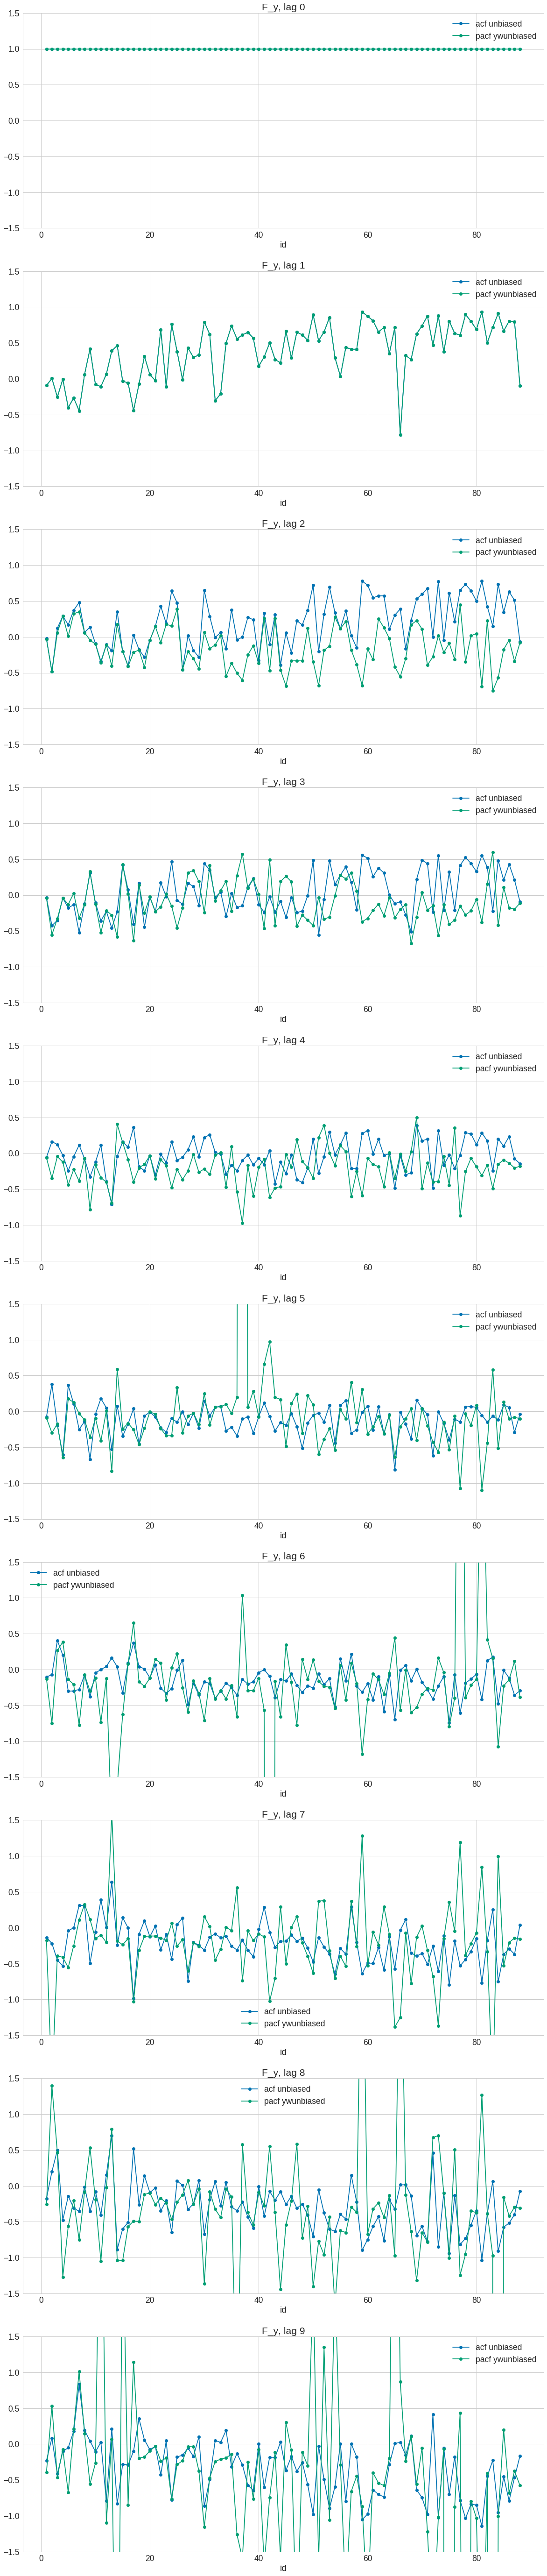

In [19]:
plt.figure(figsize=(20, nlags*10))
for lag in range(nlags):
    plt.subplot(nlags,1,lag+1)
    plt.plot(acf_results[lag], 'o-')  # acf
    plt.plot(pacf_results[lag], 'o-')  # pacf
    plt.legend(['acf unbiased', 'pacf ywunbiased'])
    plt.title('{}, lag {}'.format(colname, lag))
    plt.ylim([-1.5, 1.5])
    plt.xlabel('id')
plt.show()

The values for lag 1 are identical for acf and pacf. For higher lags, PACF and ACF yields values outside the value range [-1, 1].

## Investigate a simple, stationary AR Process

In [20]:
# The AR(1) process, according to https://en.wikipedia.org/wiki/Autoregressive_model#Definition
# X[t] = c + phi * X[t-1] + epsilon_t
np.random.seed(0)
T = 15
c = 2
epsilon = np.random.randn(T)
ar_process = np.repeat(1.0, T)
phi = 0.85
for t in range(T-1):
    ar_process[t+1] = phi*ar_process[t] + c  + epsilon[t]

ar_process = pd.Series(ar_process)
# ar_process = (ar_process - np.mean(ar_process)) / np.std(ar_process)

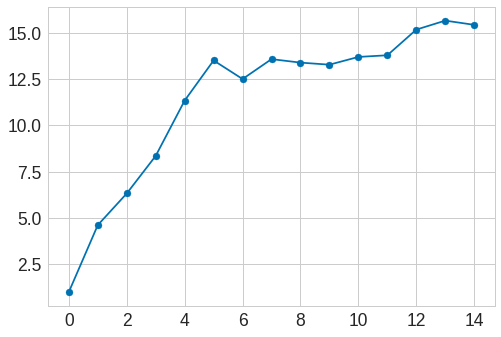

In [21]:
plt.scatter(range(len(ar_process)), ar_process)
plt.plot(ar_process)
plt.show()

In [22]:
nlags = 20

In [23]:
# Calculate using Pandas autocorr
autocorr_coeffs = []
for lag in range(nlags):
    autocorr_coeffs.append(pd.Series(ar_process).autocorr(lag))

/home/niklas/anaconda3/envs/py27tsfresh/lib/python2.7/site-packages/numpy/lib/function_base.py:3154: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/home/niklas/anaconda3/envs/py27tsfresh/lib/python2.7/site-packages/numpy/lib/function_base.py:3088: RuntimeWarning: divide by zero encountered in double_scalars
  c *= 1. / np.float64(fact)


In [24]:
# Use statsmodes ACF
acf_coeffs = acf(ar_process, unbiased=True, nlags=nlags)

In [25]:
# Use statsmodels PACF
pacf_coeffs = pacf(ar_process, method='yw', nlags=nlags-1)

/home/niklas/anaconda3/envs/py27tsfresh/lib/python2.7/site-packages/statsmodels/regression/linear_model.py:1119: RuntimeWarning: invalid value encountered in double_scalars
  r[k] = (X[0:-k]*X[k:]).sum() / denom(k)


Sometimes, the result of `pacf` is an error caused by a singular matrix. Try to check that.

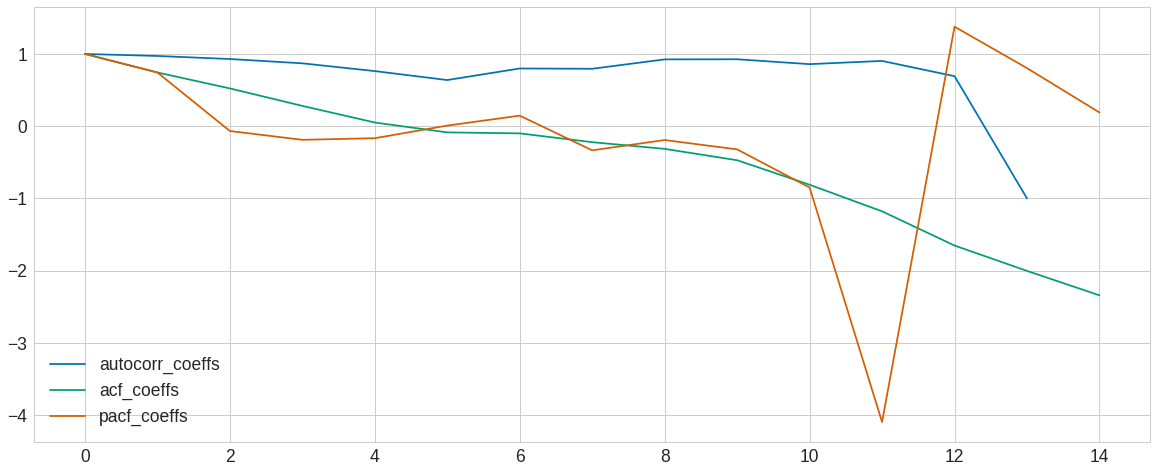

In [26]:
plt.figure(figsize=(20,8))
plt.plot(autocorr_coeffs)
plt.plot(acf_coeffs)
plt.plot(pacf_coeffs)
plt.legend(['autocorr_coeffs', 'acf_coeffs', 'pacf_coeffs'])
plt.show()

The values are different and some of them are outside the range [-1, 1]. Standardizing does not change anything. 

## Conclusion

- Check what happens when using `impute` instad of `impute_dataframe_zero`
- There are no tests for `autocorrelation` atm, maybe one should add some
- Tbh, I expected the values for `autocorr` and `acf` to be the same. What am I missing?
- I tried to match the `autocorr` results with the `acf` results, but I failed.
- ACF and PACF generate values outside the value range [-1, 1]. One could catch this as exceptions
- `autocorr` is using `np.corrcoef` internally.
- The values of autocorr, acf and pacf are different except for lag 1 but are correlated in general
- **Shall PACF be included in tsfresh, too?**